# ML and Visualize Works on Marketing Behavior Data

*Marketing behavior prediction dataset simulates marketing interaction data for 500 users, including a range of engagement metrics and user behavior features. - information of data set from [Kaggle](https://www.kaggle.com/datasets/ziya07/marketing-behavior-prediction-dataset/data).*

We will create some prediction models with some data visualizations for this data set. To do this, we will first start by examining the data. We will apply preprocessing where necessary. Thus, we will reach the part of training machine learning algorithms with data visualization.

Let's start with <code>examination of the data</code>.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

print('Imports are successful!')

Imports are successful!


Create the data variable.

In [2]:
df = pd.read_csv('/kaggle/input/marketing-behavior-prediction-dataset/marketing_data.csv')
df.head()

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,2,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,3,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,4,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


Our data has normalized before. For this part, we do not have to normalize them. Look at types of the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Likes                   500 non-null    float64
 2   Shares                  500 non-null    float64
 3   Comments                500 non-null    float64
 4   Clicks                  500 non-null    float64
 5   Engagement_with_Ads     500 non-null    float64
 6   Time_Spent_on_Platform  500 non-null    float64
 7   Purchase_History        500 non-null    int64  
 8   Engagement_Level        500 non-null    object 
 9   Purchase_Likelihood     500 non-null    int64  
 10  brand                   500 non-null    float64
 11  buy                     500 non-null    float64
 12  coupon                  500 non-null    float64
 13  deal                    500 non-null    float64
 14  discount                500 non-null    fl

Like we want, we generally have numerical types in our columns. It is wonderful. That means we do not need to convert anything in our columns -for right now, later, we will do.

Moreover, as you can see above, we do not have any empty cells. But for checking this:

In [4]:
df.isna().sum()

User_ID                   0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Engagement_Level          0
Purchase_Likelihood       0
brand                     0
buy                       0
coupon                    0
deal                      0
discount                  0
exclusive                 0
limited                   0
new                       0
offer                     0
product                   0
sale                      0
shopping                  0
dtype: int64

There is <code>really</code> no empty cell in our data. Great! That means we can continue to preprocessing part.

## Data Preprocessing

Everything is perfect, but we still have to do a thing. <code>User_ID</code> column need to be deleted. Because it is an identification column, we do not want it. It is not required for machine learning part of our project. So, remove it.

In [5]:
df.drop('User_ID', axis=1, inplace=True)

One of our column has values like <code>Low, Medium, High</code>. Let's make it like <code>0.33333, 0.66666, 0.99999</code>.

In [6]:
df['Engagement_Level'] = df['Engagement_Level'].map({'Low': 0.33333, 'Medium': 0.66666, 'High': 0.99999})
df['Engagement_Level'] = df['Engagement_Level'].astype('float')
df['Engagement_Level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Engagement_Level
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


So, we are done for this part of the project. Our data is ready for everything right now. Let's continue with <code>machine learning</code>.

## Data Visualization

Normalization process of our data has done before. So, we will work with numbers around 0 - 1. Also some of our columns has integers, but they are also 0 or 1. Let's start.

At first, we will create a <code>box plot</code> and see our values and outliers.

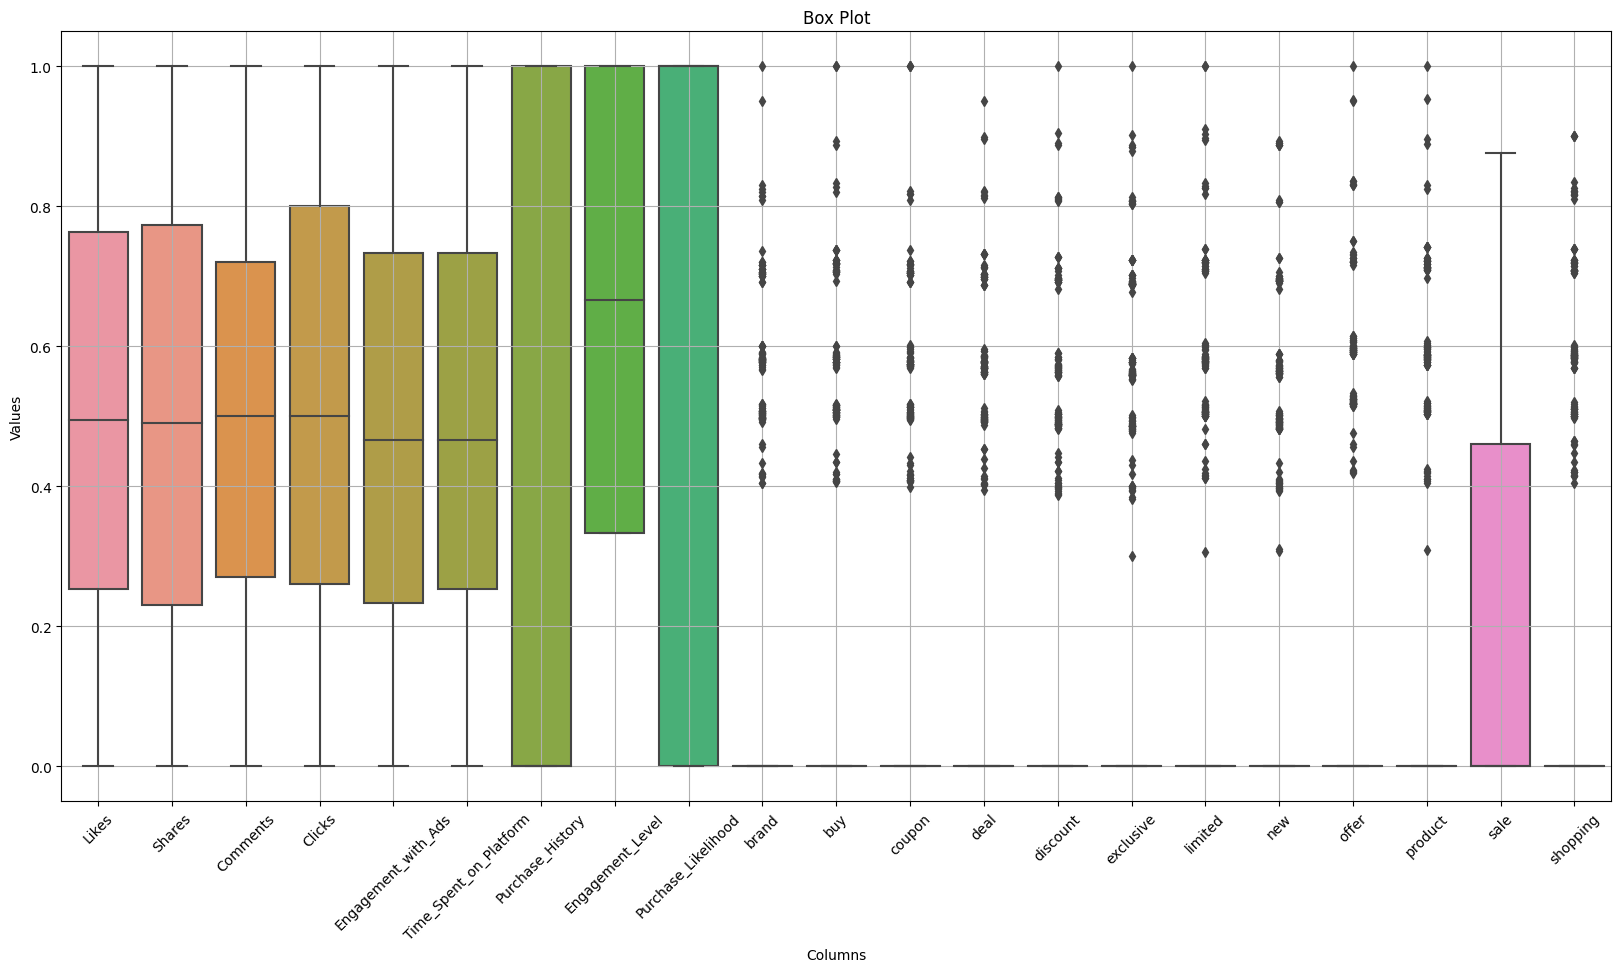

In [7]:
# Box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)

# Graph adjustment
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.grid()
plt.show()

As you can see in the box plots above:

* <code>Likes, Shares, Comments, Clicks, Engagement_Level, sale</code> columns have a box in itself which means those columns distributed homogenly and better after the normalization process.
* In <code>brand, buy, coupon, deal, discount, exclusive, limited, new, offer, product, shopping</code> columns, the data shows little variation and is mostly concentrated at 0. That is why the box plots here are very small and not visible.
* In <code>Purchase_History</code> and <code>Purchase_Likelihood</code> columns, datas are starting from 0 and ending at 1, their only data is zeros and ones.

Data looks usable and ready for machine learning. But we will also look at correlations heatmap of the data before machine learning. Let's do it.

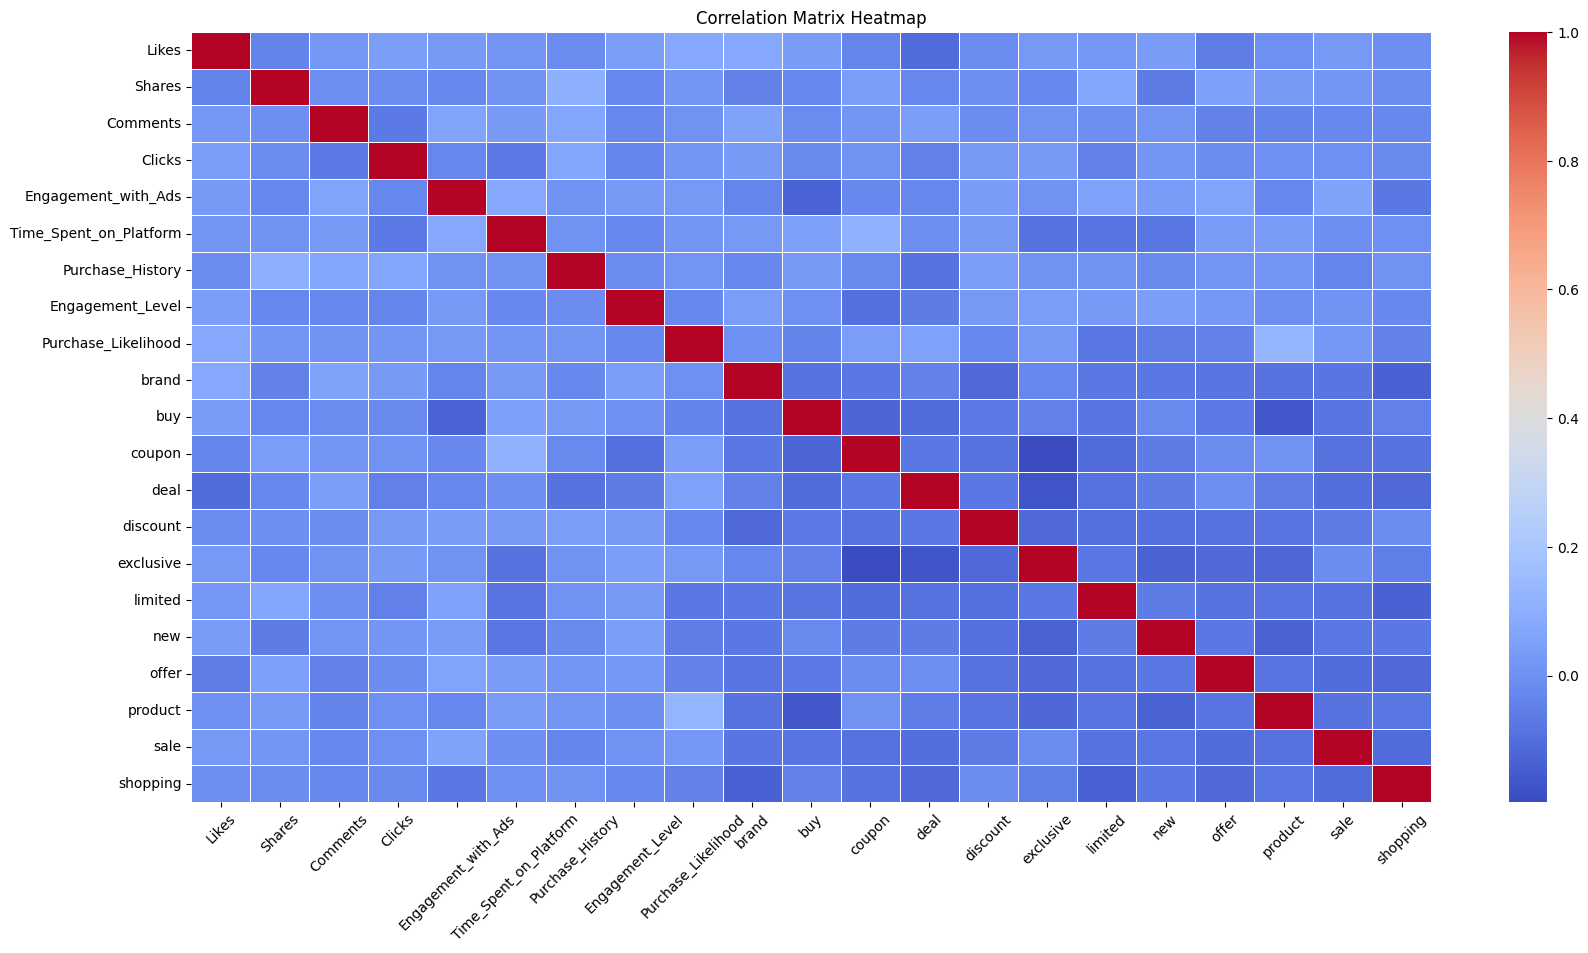

In [8]:
# Heatmap correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)

# Graph settings
plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the correlation graph above, we can understand that in general, there are no high correlations between our independent variables. This situation means that we will not fall into a problem such as <code>multicollinearity</code>.

Multicollinearity is a problem that occurs when there are <code>high correlations between independent variables</code> and can also result in a <code>decrease in the generalization performance</code> of the models.

When doing classification, it does not cause as big a problem as it does in regression. However, as you can see, it is better to work completely problem-free.

Our aim for machine learning part is <code>creating good classifiers</code>. So, we do not have a big problem here. Let's continue.

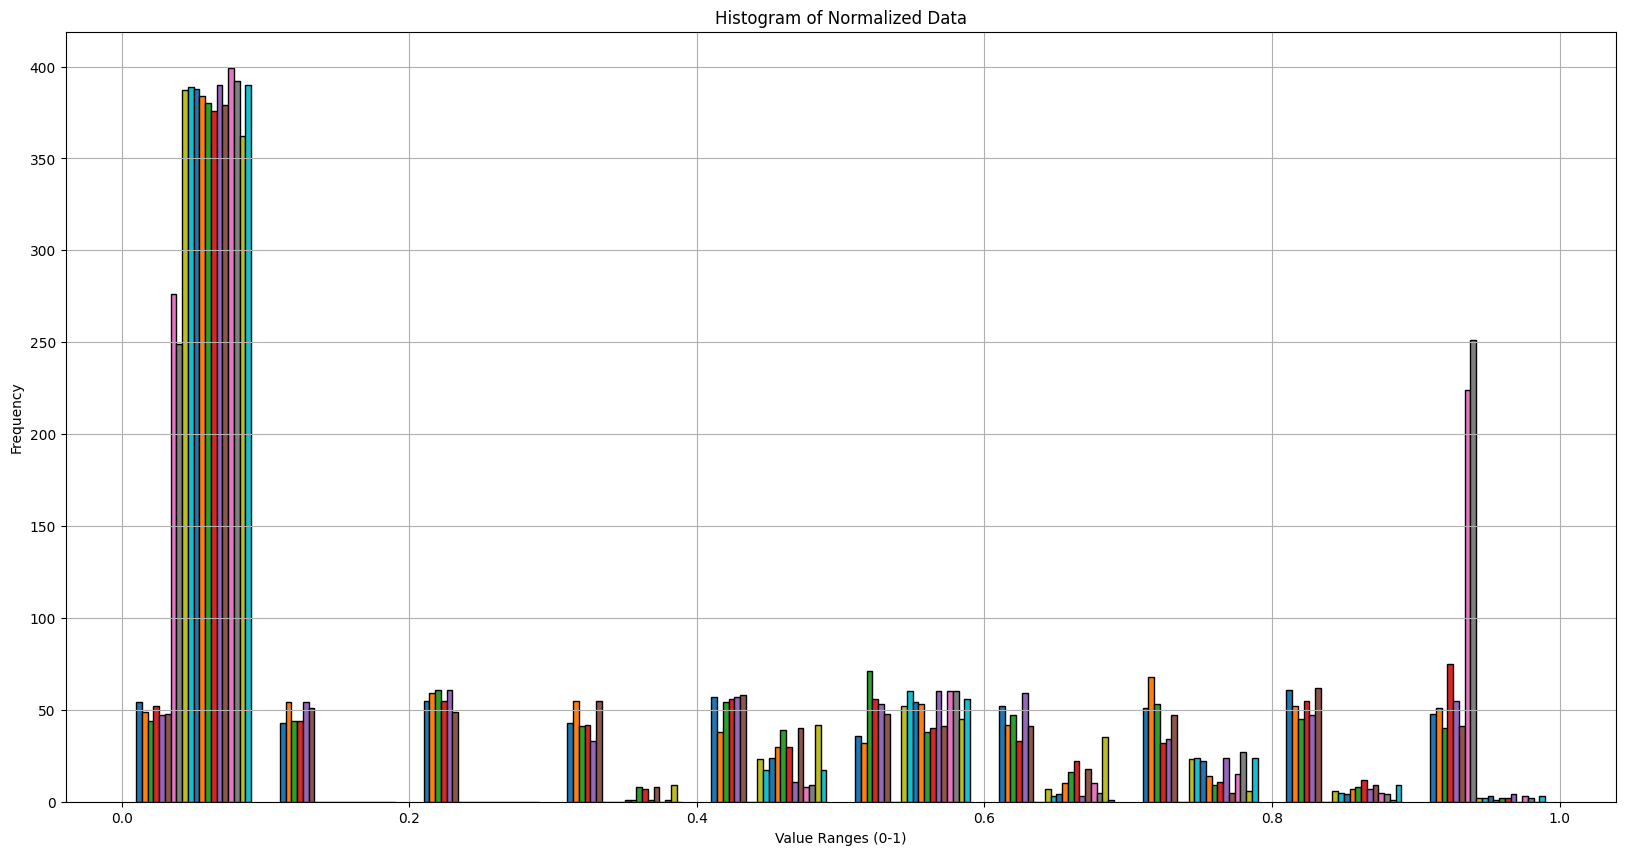

In [9]:
# Histogram creation
plt.figure(figsize=(20, 10))
plt.hist(df.drop('Engagement_Level', axis=1), bins=10, edgecolor='black')

# Graph adjustment
plt.title('Histogram of Normalized Data')
plt.xlabel('Value Ranges (0-1)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Here we check how our data is distributed. A histogram chart examines how many cells we have in our sample columns that are close to 0.33 and calculates the frequency. This is how the above chart is created.

So, we are done with our data visualization part. Right now, the time has come for <code>machine learning</code>.

## Machine Learning

From the data's homepage in Kaggle, we have that information:

------------------

*Purchase_Likelihood: A binary target variable that indicates the likelihood of a user making a purchase. It is encoded as:*

* *1 (Likely) if the user is predicted to make a purchase.*
* *0 (Unlikely) if the user is predicted to not make a purchase.*

------------------

So, our aim is predicting <code>Purchase_Likelihood</code> feature of the data set. It means that, our target value (y) will be this one. Create variables, split the data, and continue.

In [10]:
# Create the variables
X = df.drop('Purchase_Likelihood', axis=1)
y = df['Purchase_Likelihood']

# Split the data and print
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36, stratify=y)
print(f'''Train shape of the data: {X_train.shape}
Test shape of the data: {X_test.shape}''')

Train shape of the data: (375, 20)
Test shape of the data: (125, 20)


Great! So, we can talk about our machine learning processes right now. We will train these classifiers:

* Decision Tree
* Random Forest
* LightGBM
* Extra Randomized Trees

But for each one of them, we will train a <code>GridSearchCV</code>. Let's start with <code>Decision Tree Classifier</code>.

In [11]:
# Create parameters
params = {'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': [None, 5, 10, 15, 20],
          'min_samples_split': [2, 4, 5, 7, 9],
          'min_samples_leaf': [1, 2, 4, 5, 6]}

# Train a GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=3).fit(X_train, y_train)

# Train a Decision Tree Classifier
dtc = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = dtc.predict(X_test)

# Evaluate its performance
dtc_accuracy = accuracy_score(y_test, y_hat)
dtc_recall = recall_score(y_test, y_hat, average='weighted')
dtc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {dtc_accuracy}
Recall Score: {dtc_recall}
F1 Score: {dtc_f1}''')

Accuracy Score: 0.544
Recall Score: 0.544
F1 Score: 0.5439416170539658


We will talk about the performance evaluation of the models later. Let's continue with <code>Random Forest Classifier</code>.

In [12]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = rfc.predict(X_test)

# Evaluate its performance
rfc_accuracy = accuracy_score(y_test, y_hat)
rfc_recall = recall_score(y_test, y_hat, average='weighted')
rfc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {rfc_accuracy}
Recall Score: {rfc_recall}
F1 Score: {rfc_f1}''')

Accuracy Score: 0.512
Recall Score: 0.512
F1 Score: 0.5113747197129861


Train an <code>Extra Randomized Trees Classifier</code>.

In [13]:
# Train an Extra Trees Classifier and make predictions
etc = ExtraTreesClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = etc.predict(X_test)

# Evaluate the performance
etc_accuracy = accuracy_score(y_test, y_hat)
etc_recall = recall_score(y_test, y_hat, average='weighted')
etc_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {etc_accuracy}
Recall Score: {etc_recall}
F1 Score: {etc_f1}''')

Accuracy Score: 0.496
Recall Score: 0.496
F1 Score: 0.49593547148069905


Train a <code>LightGBM Classifier</code>.

In [14]:
# Create parameters and train a GridSearchCV
params = {
    'num_leaves': [7, 15, 31],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, -1],
    'min_child_samples': [10, 20, 30]
}

grid = GridSearchCV(lgb.LGBMClassifier(verbose=-1), params, cv=3).fit(X_train, y_train)

# Train a LightGBM and make predictions
lgb_model = lgb.LGBMClassifier(**grid.best_params_, verbose=-1).fit(X_train, y_train)
y_hat = lgb_model.predict(X_test)

# Evaluate the performance
lgb_accuracy = accuracy_score(y_test, y_hat)
lgb_recall = recall_score(y_test, y_hat, average='weighted')
lgb_f1 = f1_score(y_test, y_hat, average='weighted')

# Print the performance results
print(f'''Accuracy Score: {lgb_accuracy}
Recall Score: {lgb_recall}
F1 Score: {lgb_f1}''')

Accuracy Score: 0.52
Recall Score: 0.52
F1 Score: 0.5182742681047766


Project's training-models part has done. So, let's create a table and graph for performance evaluation values and communicate about the result.

In [15]:
# Create scores dictionary
scores = {'Decision Tree': [dtc_accuracy, dtc_recall, dtc_f1],
          'Random Forest': [rfc_accuracy, rfc_recall, rfc_f1],
          'Extra Randomized Trees': [etc_accuracy, etc_recall, etc_f1],
          'LightGBM': [lgb_accuracy, lgb_recall, lgb_f1]
}

# Create the data frame and show it
scores_table = pd.DataFrame(scores)
scores_table.index = ['Accuracy', 'Recall', 'F1']
scores_table.head()

,Decision Tree,Random Forest,Extra Randomized Trees,LightGBM
Accuracy,0.544000,0.512000,0.496000,0.520000
Recall,0.544000,0.512000,0.496000,0.520000
F1,0.543942,0.511375,0.495935,0.518274


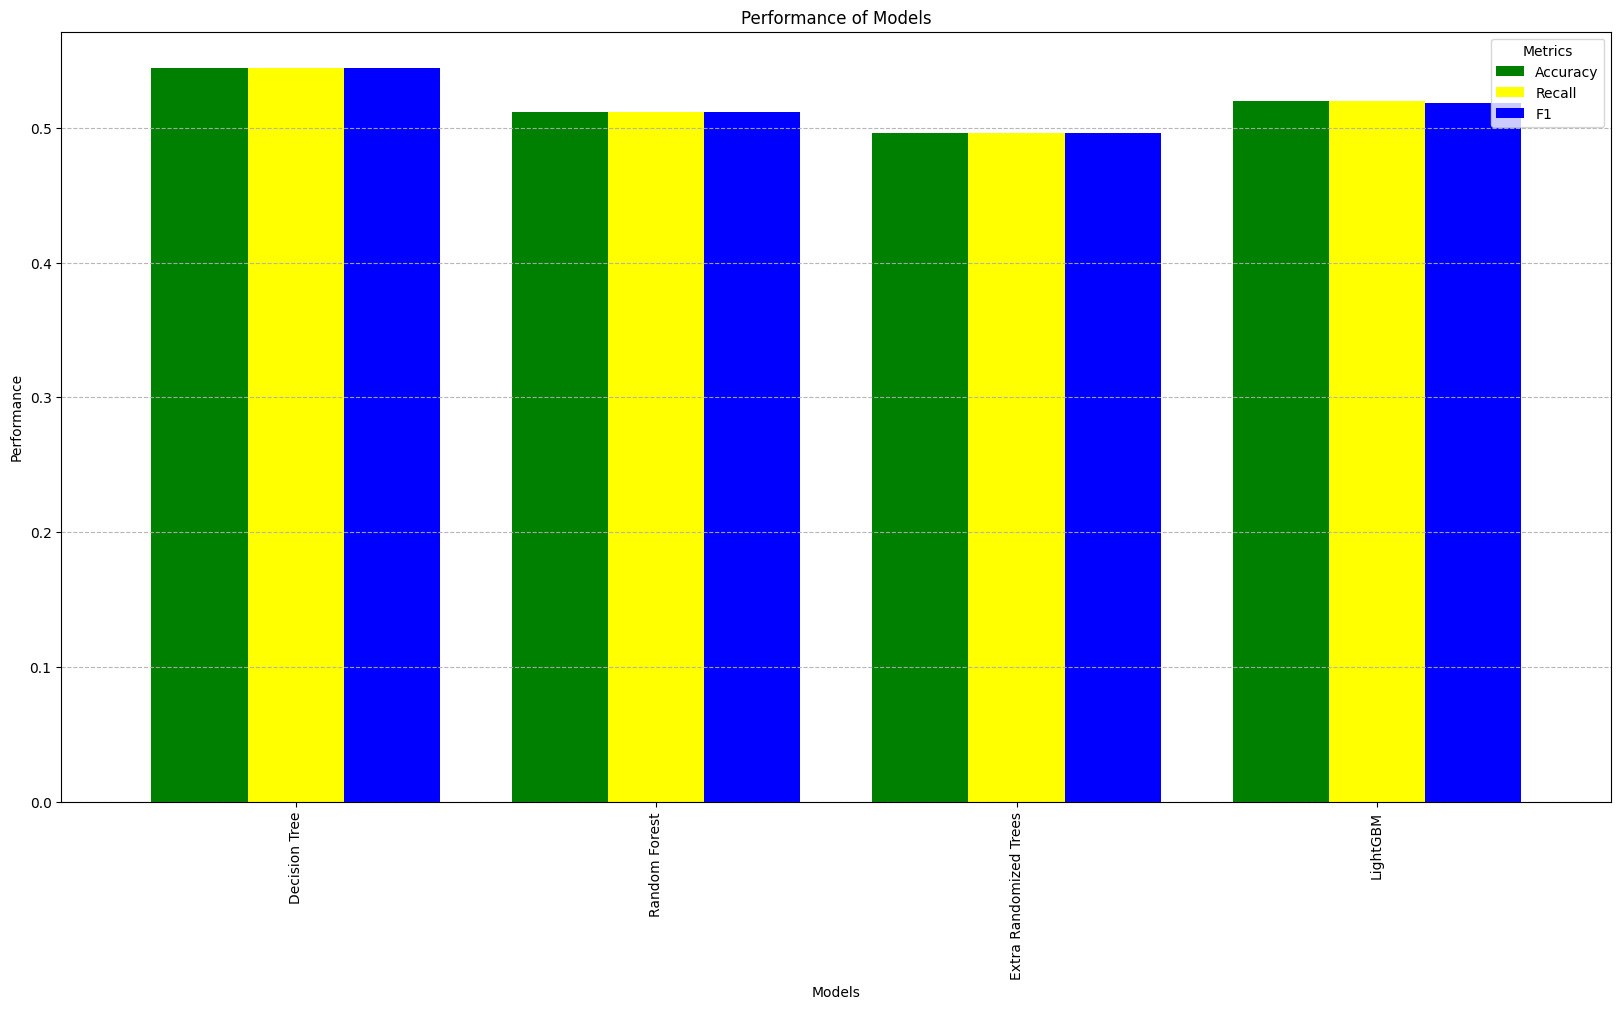

In [16]:
# Graph creation
scores_table.T.plot(kind='bar', width=0.8, color=['green', 'yellow', 'blue'], figsize=(20, 10))

# Graph adjustment
plt.title('Performance of Models')
plt.xlabel('Models')
plt.ylabel('Performance')
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

Here, you can see we have got scores approximately 50%, which is not so good. The reason behind low scores is that we have not so many data rows in our data set. For better scores, we need more data. But we discovered those results from our data.

For my experience, I see that <code>Decision Tree Classifier</code> for the best one. After running this notebook it may change, but for my output, results like that.

So, you have reached the bottom part of this project. Hope that my project will help to the future projects.

### Thank you.

#### Author: Mert Kont